<a href="https://colab.research.google.com/github/bayuardip/My-Project/blob/master/Multiple_Linear_Regression_23_5_2023_pt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Importing Model



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Opening YFinance File

In [2]:
import yfinance as yf
company = "BBRI.jk"
tick = yf.Ticker(company)
df = tick.history(period="5y")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-11-23 00:00:00+07:00,2925.642577,2967.082274,2875.914942,2884.202881,77910800,0.0,0.0
2018-11-26 00:00:00+07:00,2859.339207,2942.218604,2859.339207,2933.930664,82014400,0.0,0.0
2018-11-27 00:00:00+07:00,2884.203402,3000.234573,2884.203402,2983.658691,172878800,0.0,0.0
2018-11-28 00:00:00+07:00,3025.098145,3033.386085,2967.082564,3025.098145,96069700,0.0,0.0
2018-11-29 00:00:00+07:00,3066.537744,3116.265383,3049.961864,3074.825684,138182700,0.0,0.0


In [3]:
df.reset_index(inplace=True)
df.drop(columns=["Date","Dividends","Stock Splits"],inplace=True)
df.head(10)

,Open,High,Low,Close,Volume
0,2925.642577,2967.082274,2875.914942,2884.202881,77910800
1,2859.339207,2942.218604,2859.339207,2933.930664,82014400
2,2884.203402,3000.234573,2884.203402,2983.658691,172878800
3,3025.098145,3033.386085,2967.082564,3025.098145,96069700
4,3066.537744,3116.265383,3049.961864,3074.825684,138182700
5,3033.386136,3058.249957,2991.946435,3000.234375,211886100
6,3083.113575,3132.841213,3058.249756,3058.249756,136737400
7,3058.249804,3107.977443,3049.961864,3074.825684,134411900
8,3016.810204,3049.961965,2991.946384,3025.098145,140136800
9,3016.810204,3049.961965,2991.946384,3025.098145,108827300


In [4]:
next = []
for i in range(len(df)):
  if i < len(df) - 1:
    next.append(df["Close"][i+1])
  else:
    next.append(0)

df["Next"] = next
df.head()

,Open,High,Low,Close,Volume,Next
0,2925.642577,2967.082274,2875.914942,2884.202881,77910800,2933.930664
1,2859.339207,2942.218604,2859.339207,2933.930664,82014400,2983.658691
2,2884.203402,3000.234573,2884.203402,2983.658691,172878800,3025.098145
3,3025.098145,3033.386085,2967.082564,3025.098145,96069700,3074.825684
4,3066.537744,3116.265383,3049.961864,3074.825684,138182700,3000.234375


In [5]:
df.drop(df.index[-1], inplace = True)

# Checking NaN

In [6]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Next      0
dtype: int64

# Checking Correlation

<Axes: >

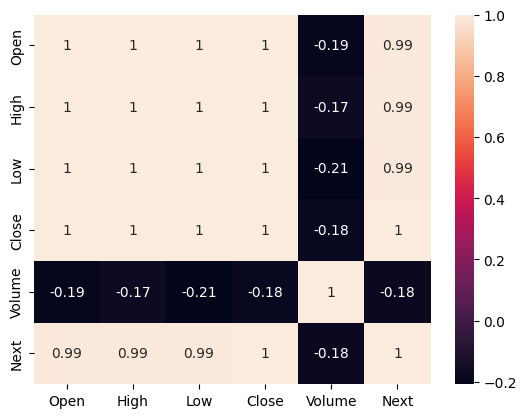

In [7]:
import seaborn as sns

sns.heatmap(df.corr(),annot=True)

# Preprocessing

## Spliting Data into X and y

In [8]:
X = df.iloc[:,[0,1,2,3]].values
y = df.iloc[:,5].values
# X = df.iloc[:,[1,2,3]].values
# y = df.iloc[:,0].values

In [9]:
X

array([[2925.64257742, 2967.08227399, 2875.91494155, 2884.20288086],
       [2859.3392065 , 2942.21860379, 2859.3392065 , 2933.93066406],
       [2884.20340169, 3000.23457303, 2884.20340169, 2983.65869141],
       ...,
       [5175.        , 5275.        , 5175.        , 5250.        ],
       [5225.        , 5250.        , 5175.        , 5200.        ],
       [5175.        , 5300.        , 5175.        , 5275.        ]])

In [10]:
y

array([2933.93066406, 2983.65869141, 3025.09814453, ..., 5200.        ,
       5275.        , 5350.        ])

## Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [12]:
X_train

array([[3815.50097002, 3832.61083984, 3806.94603511, 3832.61083984],
       [4413.19479635, 4450.83398438, 4356.7360143 , 4450.83398438],
       [3665.65748375, 3674.70848988, 3529.89239176, 3557.04541016],
       ...,
       [3232.29638672, 3232.29638672, 3232.29638672, 3232.29638672],
       [3849.72045898, 3849.72045898, 3815.50072157, 3849.72045898],
       [2896.318476  , 3046.89160778, 2736.88810118, 2781.17431641]])

In [13]:
X_test

array([[3566.09638478, 3683.75946347, 3547.99437268, 3656.60644531],
       [2302.88318723, 2320.59767328, 2267.45421512, 2285.16870117],
       [3383.46721212, 3401.18170014, 3188.60784388, 3197.46508789],
       ...,
       [3883.93969888, 3901.0495654 , 3866.82983237, 3875.38476562],
       [2967.17689125, 3055.74933576, 2922.89066899, 2949.46240234],
       [4235.87136359, 4244.92237078, 4118.20827016, 4127.25927734]])

In [14]:
y_train

array([3901.05004883, 4422.60449219, 3484.63696289, 3529.89233398,
       3182.56860352, 3323.46362305, 3789.8359375 , 3000.234375  ,
       2772.31762695, 3511.7902832 , 4516.70214844, 3601.62744141,
       5225.        , 4091.0546875 , 3141.12915039, 3567.4074707 ,
       3232.29638672, 3516.07788086, 5575.        , 3702.32788086,
       3674.70849609, 4121.49072266, 3601.62744141, 3610.18237305,
       3738.06542969, 4328.50634766, 3764.17114258, 3960.93481445,
       5075.        , 5000.        , 4860.        , 4840.        ,
       4880.        , 3765.21850586, 2356.02685547, 4300.27685547,
       3801.42236328, 3282.02416992, 4136.33349609, 3808.61474609,
       3533.18798828, 3049.96191406, 4601.39013672, 3520.84130859,
       4018.64624023, 4382.93505859, 3867.42626953, 4497.27246094,
       4401.99121094, 3241.7512207 , 3558.8527832 , 3464.74853516,
       2914.03320312, 4319.09619141, 3259.42993164, 3353.53417969,
       3551.75488281, 4140.31005859, 3107.97753906, 3267.41308

In [15]:
y_test

array([3566.09643555, 2418.02758789, 3294.89477539, 3879.47265625,
       3041.67382812, 3215.72070312, 5425.        , 2418.02758789,
       3665.6574707 , 4281.45751953, 3928.13671875, 3575.96240234,
       5150.        , 3806.94580078, 4168.54003906, 4535.38476562,
       2710.31665039, 3403.17822266, 3370.64404297, 3413.41870117,
       3882.8815918 , 4582.57080078, 3481.85839844, 3108.89257812,
       4601.39013672, 5250.        , 3596.96606445, 3611.35131836,
       4591.98046875, 3000.234375  , 3370.64404297, 4092.04663086,
       3356.61572266, 4118.61816406, 5500.        , 5400.        ,
       4450.83398438, 4469.65332031, 4375.55517578, 3684.61352539,
       3765.21850586, 3873.83056641, 2781.17431641, 3764.32885742,
       3704.28662109, 4375.55517578, 3696.42138672, 3693.47070312,
       3621.82983398, 3810.47338867, 2983.65869141, 5500.        ,
       4375.55517578, 3497.51074219, 3683.75952148, 4121.49072266,
       4830.        , 3982.44262695, 3661.51196289, 3601.62744

# Making Model

In [16]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
result = pd.DataFrame({
    "Real":y_test,
    "Pred":np.concatenate((y_pred.reshape(len(y_pred),1)))
})
result.head()

,Real,Pred
0,3566.096436,3657.399006
1,2418.027588,2298.747416
2,3294.894775,3208.683530
3,3879.472656,3848.113305
4,3041.673828,3015.897327


# Evaluating Model

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

print("Results:\n----------")
print(f"Intercept: {regressor.intercept_}")
print(f"Coef: {regressor.coef_}")
print(f"Mean Error: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"\nR^2 Score: {r2_score(y_test,y_pred)}")

Results:
----------
Intercept: 25.512768390042766
Coef: [-0.15  0.15  0.24  0.76]
Mean Error: 65.38097129421855

R^2 Score: 0.9922091320554194


In [19]:
# evaluate on the train dataset
train_yhat = regressor.predict(X_train)
train_acc = r2_score(y_train, train_yhat)
# evaluate on the test dataset
test_yhat = regressor.predict(X_test)
test_acc = r2_score(y_test, test_yhat)
# summarize progress
print(f"Train: {train_acc} Test: {test_acc}")

Train: 0.9912936789893748 Test: 0.9922091320554194


In [20]:
df = tick.history()
df.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-11-10 00:00:00+07:00,5150.0,5150.0,5050.0,5075.0,113811900,0.0,0.0
2023-11-13 00:00:00+07:00,5075.0,5125.0,5025.0,5025.0,63126900,0.0,0.0
2023-11-14 00:00:00+07:00,5075.0,5125.0,5050.0,5075.0,85419500,0.0,0.0
2023-11-15 00:00:00+07:00,5200.0,5300.0,5175.0,5250.0,193790400,0.0,0.0
2023-11-16 00:00:00+07:00,5275.0,5275.0,5175.0,5250.0,99488800,0.0,0.0
2023-11-17 00:00:00+07:00,5175.0,5250.0,5175.0,5225.0,70727500,0.0,0.0
2023-11-20 00:00:00+07:00,5175.0,5275.0,5175.0,5250.0,54123600,0.0,0.0
2023-11-21 00:00:00+07:00,5225.0,5250.0,5175.0,5200.0,104110500,0.0,0.0
2023-11-22 00:00:00+07:00,5175.0,5300.0,5175.0,5275.0,103585500,0.0,0.0


In [22]:
y_pred = regressor.predict([[5600.0,5625.0,5475.0,5550.0]])
np.set_printoptions(precision=2)
result = np.concatenate((y_pred.reshape(len(y_pred),1)))
print(result[0])

5536.0092493373395


# Improving Model

## Check Possible Improvement

In [23]:
rand_state = []
train_accuracy = []
test_accuracy = []
different = []
t_size = []

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
for i in range(2000):
  for j in range(20,31):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = j/100, random_state = i)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    train_yhat = regressor.predict(X_train)
    train_acc = r2_score(y_train, train_yhat)
    # evaluate on the test dataset
    test_yhat = regressor.predict(X_test)
    test_acc = r2_score(y_test, y_pred)
    dif = test_acc - train_acc
    # summarize progress
    if r2_score(y_test,y_pred) < 0.70:
      pass
    else:
      if dif > 0.05 :
        pass
      else:
        if dif < 0 :
          pass
        else:
          t_size.append(j/100)
          rand_state.append(i)
          train_accuracy.append(train_acc)
          test_accuracy.append(test_acc)
          different.append(dif)

In [25]:
score = pd.DataFrame({
    "Random State":rand_state,
    "Test Size":t_size,
    "Train Accuracy":train_accuracy,
    "Test Accuracy":test_accuracy,
    "Different":different
})
final = score.sort_values(by=["Test Accuracy"], ascending=False).sort_values(by=["Different"])
final.head()

,Random State,Test Size,Train Accuracy,Test Accuracy,Different
5759,1217,0.23,0.991523,0.991523,2.651381e-09
7561,1573,0.20,0.991554,0.991554,3.135303e-08
4603,950,0.22,0.991557,0.991558,3.481031e-07
7855,1626,0.20,0.991553,0.991553,4.649940e-07
1647,330,0.28,0.991542,0.991542,4.886256e-07
